# `dtreeviz` scikit-learn Examples

([View this notebook in Colab](https://colab.research.google.com/github/parrt/dtreeviz/blob/master/notebooks/dtreeviz_sklearn_visualisations.ipynb))

## Interactive AI Chat

With AI integration enabled, you can ask ad hoc questions about your decision tree model using the `chat()` method. The AI has access to comprehensive knowledge about your tree structure, nodes, and training data, enabling it to answer questions about:

* **Tree structure**: Overall architecture, depth, node count, splitting criteria, and tree type (classification/regression)
* **Tree nodes**: Split conditions, feature usage, node statistics, sample distributions, and purity measures at internal nodes
* **Leaf nodes**: Predictions, confidence scores, sample counts, and class distributions
* **Training dataset**: Feature statistics, target distributions, and data characteristics within nodes or leaves

Examples of questions you might ask:
- "What is the distribution of training labels?"
- "Give me a short summary of the tree structure"
- "Explain the Gini criterion used for splitting nodes"
- "How does a leaf node determine the confidence of its prediction?"
- "What can you tell me about the samples in leaf 11?"
- "What features are used for splitting at internal nodes?"
- "Which leaf has the highest prediction confidence?"
- "Compare the feature statistics in node 5 with the overall training set"

The AI has access to the actual tree structure, all node details, and training data statistics, allowing it to provide contextual and accurate answers based on your specific model.

The [dtreeviz](https://github.com/parrt/dtreeviz) library is designed to help machine learning practitioners visualize and interpret decision trees and decision-tree-based models, such as gradient boosting machines.  

The purpose of this notebook is to illustrate the main capabilities and functions of the dtreeviz API. To do that, we will use scikit-learn and the toy but well-known Titanic data set for illustrative purposes.  

## AI Integration

This notebook demonstrates dtreeviz's AI-powered explanation capabilities. The AI integration enhances traditional visualizations by providing:

* **Natural language explanations**: AI-generated explanations that describe tree structure, splits, and predictions in plain language
* **Interactive chat interface**: Ask questions about your decision tree model and receive contextual answers based on the actual tree structure and training data
* **Enhanced interpretability**: Bridge the gap between technical tree visualizations and human understanding through conversational AI

The goal of AI integration is to make decision trees more accessible and interpretable, especially for non-technical stakeholders, by translating complex tree logic into clear, natural language explanations. When initializing a dtreeviz model, you can enable AI features by setting `ai_chat=True` and specifying an `ai_model` (e.g., "gpt-4.1-mini").

Currently, dtreeviz supports the following decision tree libraries:
* [scikit-learn](https://scikit-learn.org/stable)
* [XGBoost](https://xgboost.readthedocs.io/en/latest)
* [Spark MLlib](https://spark.apache.org/mllib/)
* [LightGBM](https://lightgbm.readthedocs.io/en/latest/)
* [Tensorflow](https://www.tensorflow.org/decision_forests)

To interopt with these different libraries, dtreeviz uses an adaptor object, obtained from function `dtreeviz.model()`, to extract model information necessary for visualization. Given such an adaptor object, all of the dtreeviz functionality is available to you using the same programmer interface. The basic dtreeviz usage recipe is:

1. Import dtreeviz and your decision tree library
2. Acquire and load data into memory
3. Train a classifier or regressor model using your decision tree library
4. Obtain a dtreeviz adaptor model using<br>`viz_model = dtreeviz.model(your_trained_model,...)`
5. Call dtreeviz functions, such as<br>`viz_model.view()` or `viz_model.explain_prediction_path(sample_x)`

The four categories of dtreeviz functionality are:

1. Tree visualizations
2. Prediction path explanations
3. Leaf information
4. Feature space exploration

We have grouped code examples by [classifiers](#Classifiers) and [regressors](#Regressors), with a follow up section on [partitioning feature space](#Feature-Space-Partitioning).

*These examples require dtreeviz 2.0 or above because the code uses the new API introduced in 2.0.*

## Setup

In [2]:
import sys
import os

In [3]:
%config InlineBackend.figure_format = 'retina' # Make visualizations look good
#%config InlineBackend.figure_format = 'svg' 
%matplotlib inline

if 'google.colab' in sys.modules:
  !pip install -q dtreeviz

In [4]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

import dtreeviz

from dtreeviz import ai_explanation

random_state = 1234 # get reproducible trees

## Load Sample Data

In [5]:
dataset_url = "https://raw.githubusercontent.com/parrt/dtreeviz/master/data/titanic/titanic.csv"
dataset = pd.read_csv(dataset_url)
# Fill missing values for Age
dataset.fillna({"Age":dataset.Age.mean()}, inplace=True)
# Encode categorical variables
dataset["Sex_label"] = dataset.Sex.astype("category").cat.codes
dataset["Cabin_label"] = dataset.Cabin.astype("category").cat.codes
dataset["Embarked_label"] = dataset.Embarked.astype("category").cat.codes

In [6]:
dataset.dtypes

PassengerId         int64
Survived            int64
Pclass              int64
Name               object
Sex                object
Age               float64
SibSp               int64
Parch               int64
Ticket             object
Fare              float64
Cabin              object
Embarked           object
Sex_label            int8
Cabin_label         int16
Embarked_label       int8
dtype: object

In [ ]:
# Set your OpenAI API key here to enable AI-powered explanations and chat functionality
# Replace "your-openai-api-key-here" with your actual OpenAI API key
os.environ["OPENAI_API_KEY"] = "your-openai-api-key-here"

# Classifiers

To demonstrate classifier decision trees, we trying to model using six features to predict the boolean survived target.

In [8]:
features = ["Pclass", "Age", "Fare", "Sex_label", "Cabin_label", "Embarked_label"]
target = "Survived"

tree_classifier = DecisionTreeClassifier(max_depth=3, random_state=random_state)
tree_classifier.fit(dataset[features].values, dataset[target].values)

DecisionTreeClassifier(max_depth=3, random_state=1234)

## Initialize dtreeviz model (adaptor)

To adapt dtreeviz to a specific model, use the `model()` function to get an adaptor.  You'll need to provide the model, X/y data, feature names, target name, and target class names. 

To enable AI-powered explanations and chat functionality, you can also specify `ai_chat=True`, choose an `ai_model` (defaults to "gpt-4.1-mini" as defined in `ai_explanation.py`), and optionally set `max_history_messages` to control the conversation context.

We'll use this model to demonstrate dtreeviz functionality in the following sections; the code will look the same for any decision tree library once we have this model adaptor.

In [ ]:
viz_model = dtreeviz.model(tree_classifier,
                           X_train=dataset[features], y_train=dataset[target],
                           feature_names=features,
                           target_name=target, class_names=["perish", "survive"],
                           ai_chat=True,
                           ai_model="gpt-4.1-mini",
                           max_history_messages=10)

### Interactive AI Chat

With AI integration enabled, you can ask ad hoc questions about your decision tree model using the `chat()` method. The AI has access to comprehensive knowledge about your tree structure, nodes, and training data, enabling it to answer questions about:


* **Tree structure**: Overall architecture, depth, node count, splitting criteria, and tree type (classification/regression)
* **Tree nodes**: Split conditions, feature usage, node statistics, sample distributions, and purity measures at internal nodes
* **Leaf nodes**: Predictions, confidence scores, sample counts, and class distributions
* **Training dataset**: Feature statistics, target distributions, and data characteristics within nodes or leaves





In [ ]:
viz_model.chat("Please give me a short summary of the tree structure?")

The decision tree has a maximum depth of 3 and consists of 15 nodes. It starts by splitting on the
feature "Sex_label" at a threshold of 0.5. From there, it branches into two main subtrees: one
splits on "Pclass" at 2.5, and the other on "Cabin_label" at 3.5. Further splits occur on "Age"
(thresholds 2.5, 3.5, and 17.5) and "Fare" (threshold 23.35). The tree structure efficiently
partitions the data based on these features to reach leaf nodes that predict survival or perish
outcomes.


In [ ]:
viz_model.chat("What is the distribution of training labels ?")

The training set contains 891 samples with two classes for the target "Survived." The class
distribution is:
- Class 0 ("perish"): 549 samples
- Class 1 ("survive"): 342 samples
This indicates that about 61.6% of the training data corresponds to passengers who did not survive,
and 38.4% survived.


## Tree structure visualizations

To show the decision tree structure using the default visualization, call `view()`:

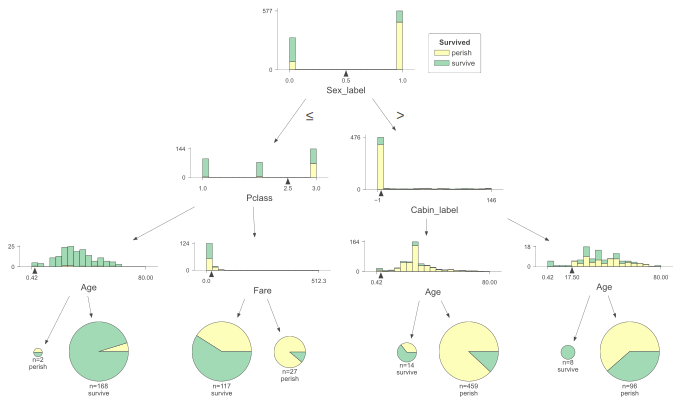

This decision tree reveals several key insights about the factors influencing survival. The very
first and most important split is on the "Sex_label" feature, indicating that gender is the
strongest predictor of survival. This aligns with historical knowledge that women had a higher
chance of survival.
For passengers identified as one gender group (likely females, given the threshold 0.5 on a binary
label), the next important factor is "Pclass" (passenger class). Those in higher classes (Pclass ≤
2.5) tend to have a much higher survival rate, with leaf nodes showing strong confidence in
predicting survival. Conversely, lower classes show a mixed outcome but still lean towards survival.
For the other gender group (likely males), the tree splits on "Cabin_label," which likely encodes
cabin location or presence. This split separates passengers into groups with different survival
probabilities. Further splits on "Age" and "Fare" refine these predictions. Younger passengers (Age
≤ 2.5 or 3.

In [15]:
viz_model.view(scale=1)

In [16]:
viz_model.chat("Explain the Gini criterion used for splitting nodes in this decision tree")

The Gini criterion used in this decision tree is a measure of node impurity that guides how the tree
splits the data at each internal node. It quantifies how mixed the classes are within a node: a node
is pure if all samples belong to a single class, and impure if samples are distributed across
multiple classes.
Mathematically, the Gini impurity for a node is calculated as:
\[ Gini = 1 - \sum_{i=1}^{C} p_i^2 \]
where \( p_i \) is the proportion of samples belonging to class \( i \) in that node, and \( C \) is
the total number of classes.
When the tree considers a split, it evaluates how much the Gini impurity decreases after
partitioning the data into child nodes. The goal is to find the split that results in the largest
reduction in weighted average Gini impurity of the children compared to the parent node. This means
the split creates subsets that are more homogeneous in terms of class labels.
Using the Gini criterion helps the tree to create branches that separate the classes as cl

In [17]:
viz_model.chat("How does a leaf node determine the confidence of its prediction?")

A leaf node determines the confidence of its prediction based on the proportion of training samples
belonging to the predicted class within that leaf. Specifically, the confidence is calculated as the
fraction of samples in the leaf that have the predicted class label relative to the total number of
samples in that leaf.
For example, if a leaf node contains 100 samples, with 90 belonging to class "survive" and 10 to
class "perish," and the node predicts "survive," then the prediction confidence is 90/100 = 0.9 (or
90%). This confidence reflects how pure or homogeneous the leaf is regarding the predicted class.
In the tree, leaves with higher confidence indicate stronger certainty in their prediction because
the majority of samples in that leaf belong to the predicted class. Conversely, leaves with lower
confidence have a more mixed class distribution, signaling less certainty in the prediction.


To change the visualization, you can pass parameters, such as changing the orientation to left-to-right. 

If you want to disable the AI chat for a specific function call, you can set the `ai_chat` parameter to `False`. This can be helpful when you run the same visualizations multiple times, as it avoids regenerating AI explanations on each execution.

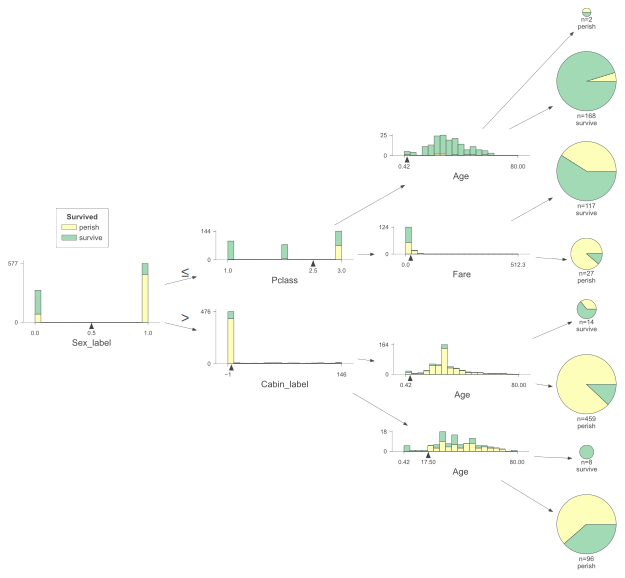

In [17]:
viz_model.view(orientation="LR", ai_chat=False)

To visualize larger trees, you can reduce the amount of detail by turning off the fancy view:

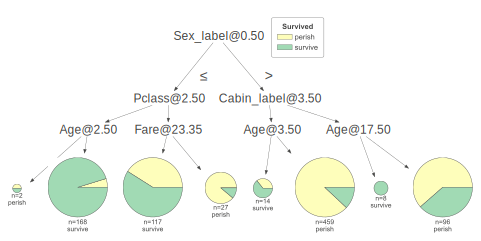

In [18]:
viz_model.view(fancy=False, ai_chat=False)

Another way to reduce the visualization size is to specify the tree depths of interest:

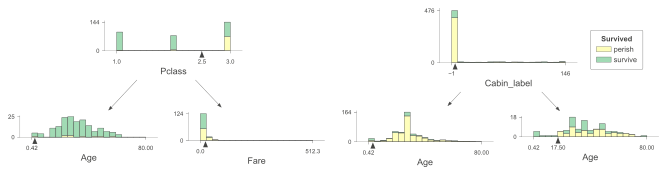

In [19]:
viz_model.view(depth_range_to_display=(1, 2), ai_chat=False) # root is level 0

## Prediction path explanations

For interpretation purposes, we often want to understand how a tree behaves for a specific instance. Let's pick a specific instance:

In [20]:
x = dataset[features].iloc[10]
x

Pclass              3.0
Age                 4.0
Fare               16.7
Sex_label           0.0
Cabin_label       145.0
Embarked_label      2.0
Name: 10, dtype: float64

/Users/tudor.lapusan/Documents/workspace/personal/dtreeviz/notebooks/../dtreeviz/models/shadow_decision_tree.py:336: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
/Users/tudor.lapusan/Documents/workspace/personal/dtreeviz/notebooks/../dtreeviz/trees.py:759: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
/Users/tudor.lapusan/Documents/workspace/personal/dtreeviz/notebooks/../dtreeviz/trees.py:1681: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[po

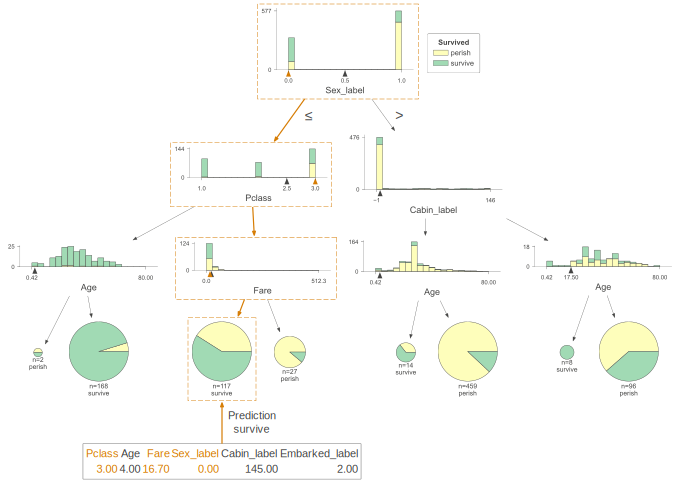

Let's analyze the decision path step-by-step to understand why the decision tree predicted "survive"
for this instance:
1. **Sex_label = 0.00, satisfies Sex_label <= 0.50**
The root node splits on the feature "Sex_label" with a threshold of 0.5. Since the instance has
Sex_label = 0.0 (likely representing female), it goes to the left child node. This split separates
the data primarily by gender, which is a strong predictor of survival in this dataset.
2. **Pclass = 3.00, satisfies Pclass > 2.50**
At the next level, the tree splits on "Pclass" with a threshold of 2.5. The instance has Pclass = 3,
which is greater than 2.5, so it moves to the right child node. This split distinguishes passengers
in the third class, who historically had lower survival rates, but this node still contains mixed
outcomes.
3. **Fare = 16.70, satisfies Fare <= 23.35**
The next split is on "Fare" with a threshold of 23.35. The instance's fare is 16.70, which is less
than or equal to 23.35, so it goes to the left

In [ ]:
viz_model.view(x=x)

/Users/tudor.lapusan/Documents/workspace/personal/dtreeviz/notebooks/../dtreeviz/models/shadow_decision_tree.py:336: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
/Users/tudor.lapusan/Documents/workspace/personal/dtreeviz/notebooks/../dtreeviz/trees.py:759: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
/Users/tudor.lapusan/Documents/workspace/personal/dtreeviz/notebooks/../dtreeviz/trees.py:1681: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[po

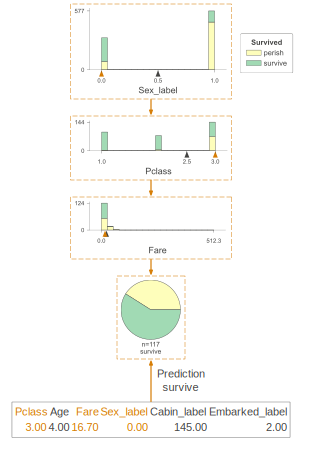

The decision tree predicted "survive" for this instance by following a sequence of splits that
progressively narrow down the group of passengers to those with similar characteristics and survival
outcomes:
1. **Sex_label = 0.00, satisfies Sex_label <= 0.50**
The first split is on "Sex_label" with a threshold of 0.5. Since the instance has Sex_label = 0.0
(likely representing female), it goes to the left child node. This split is crucial because gender
is a strong predictor of survival, with females generally having higher survival rates.
2. **Pclass = 3.00, satisfies Pclass > 2.50**
The next split is on "Pclass" with a threshold of 2.5. The instance's Pclass is 3, which is greater
than 2.5, so it moves to the right child node. This split separates third-class passengers, who
historically had lower survival chances compared to first and second class.
3. **Fare = 16.70, satisfies Fare <= 23.35**
The third split is on "Fare" with a threshold of 23.35. The instance's fare is 16.70, which i

In [22]:
viz_model.view(x=x, show_just_path=True)

You can also get a string representation explaining the comparisons made as an instance is run down the tree:

In [23]:
print(viz_model.explain_prediction_path(x))

2.5 <= Pclass 
Fare < 23.35
Sex_label < 0.5



/Users/tudor.lapusan/Documents/workspace/personal/dtreeviz/notebooks/../dtreeviz/models/shadow_decision_tree.py:336: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
/Users/tudor.lapusan/Documents/workspace/personal/dtreeviz/notebooks/../dtreeviz/interpretation.py:54: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`


If you'd like the feature importance for a specific instance, as calculated by the underlying decision tree library, use `instance_feature_importance()`:

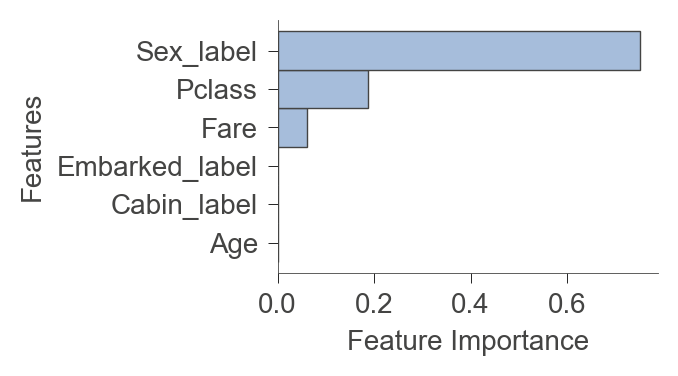

The decision tree's prediction for this instance is strongly influenced by the features it used
along the decision path, which aligns well with the feature importance ranking:
1. **Sex_label (importance: 0.7512)**
This feature has by far the highest importance, contributing over 75% to the model's decisions. The
tree's very first split is on Sex_label with a threshold of 0.5, immediately separating the data by
gender. Since the instance has Sex_label = 0.0 (likely female), it follows the branch associated
with higher survival probability. This shows that gender is the dominant factor in the model's
prediction.
2. **Pclass (importance: 0.1881)**
The second most important feature, Pclass, accounts for about 19% of the model's decision power. The
tree uses Pclass at the next level to distinguish passengers by their travel class. The instance's
Pclass = 3 leads it down the branch for third-class passengers, which historically had lower
survival rates but still allows for survival depending

In [24]:
viz_model.instance_feature_importance(x, figsize=(3.5,2))

## Leaf info

There are a number of functions to get information about the leaves of the tree.

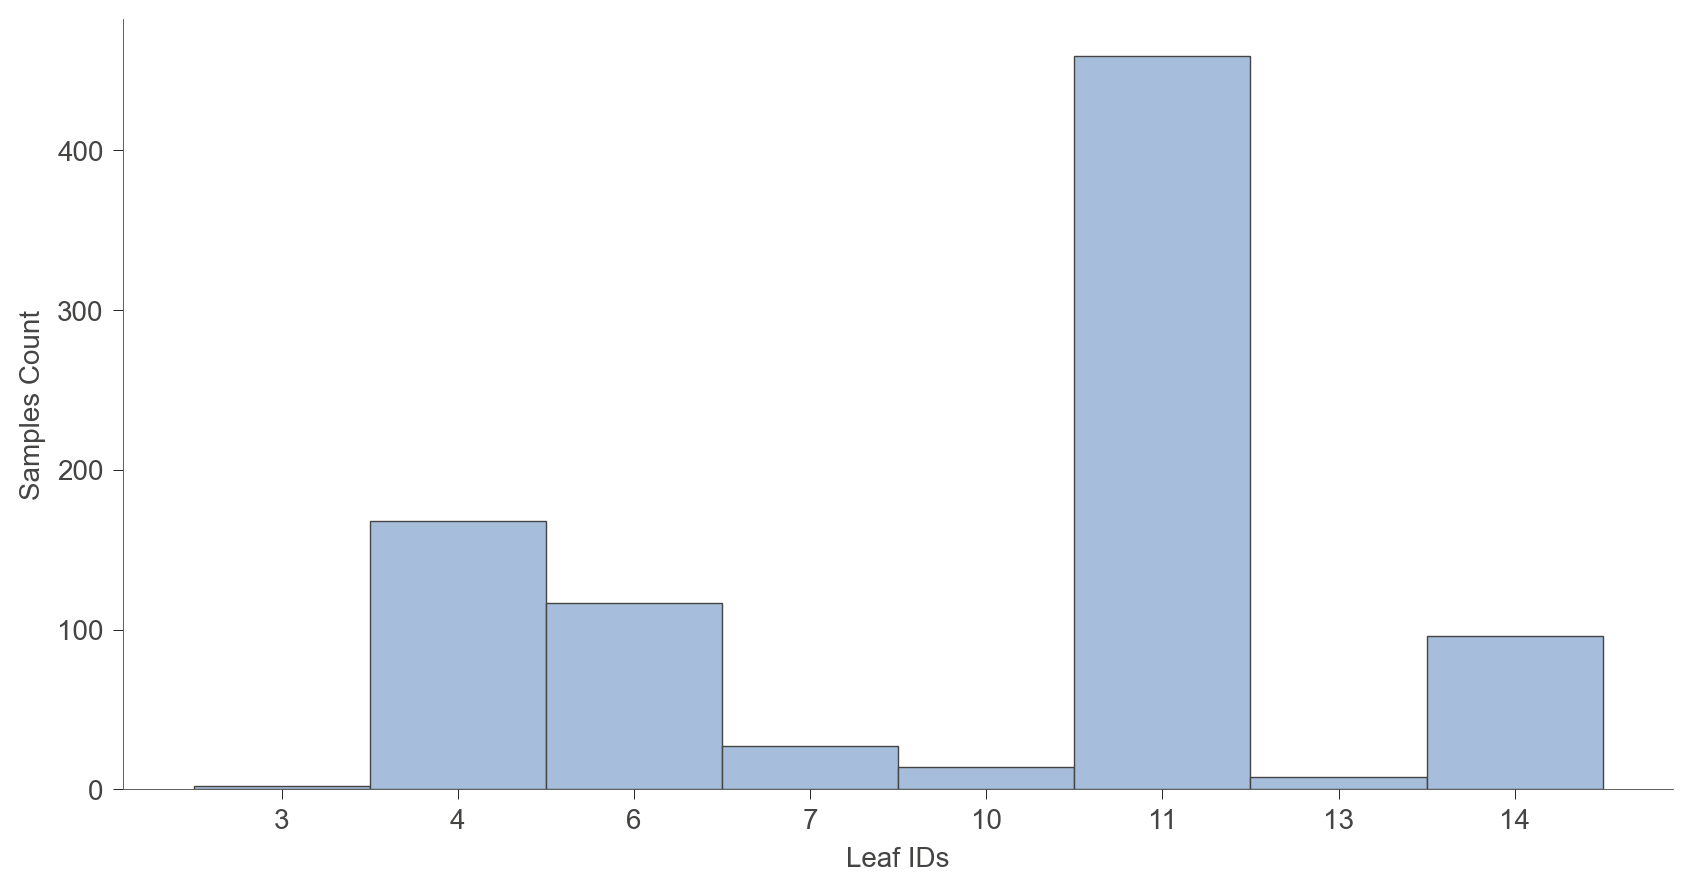

Examining the leaf nodes' sample counts and class distributions reveals several important insights
about the decision tree's terminal partitions:
1. **Variation in Leaf Sample Sizes:**
The leaf nodes vary widely in the number of samples they contain, ranging from very small leaves
like node 3 with only 2 samples, to very large leaves like node 11 with 459 samples. This indicates
that some leaves represent very specific, narrowly defined subgroups, while others cover broad, more
heterogeneous groups.
2. **Class Distribution and Prediction Confidence:**
- Some leaves have very high purity and confidence, such as leaf 13 with 8 samples all surviving
(100% confidence), and leaf 4 with 168 samples and 95% survival confidence. These leaves represent
strong, clear patterns in the data.
- Other leaves show more mixed class distributions and lower confidence, for example leaf 6 with 117
samples but only 59% survival confidence, and leaf 14 with 96 samples and 61% perish confidence.
These leaves

In [25]:
viz_model.leaf_sizes(figsize=(10,5))

In [18]:
viz_model.chat("What can you tell me about the samples in leaf 11?")

Leaf node 11 contains 459 data samples from the training set. It predicts the class "perish" (class
label 0) with a high confidence of 0.88. This means that 88% of the samples in this leaf belong to
the "perish" class.
Looking at the class distribution within this leaf, there are 404 samples labeled as "perish" and 55
samples labeled as "survive." The leaf is at level 3 in the tree, indicating it is a terminal node
reached after three splits from the root.
The relatively large number of samples and high confidence suggest this leaf represents a
well-defined subgroup of the data where the majority of individuals did not survive. The Gini
impurity at this leaf would be low, reflecting this class dominance.
In summary, leaf 11 is a substantial and relatively pure node strongly associated with the "perish"
outcome.


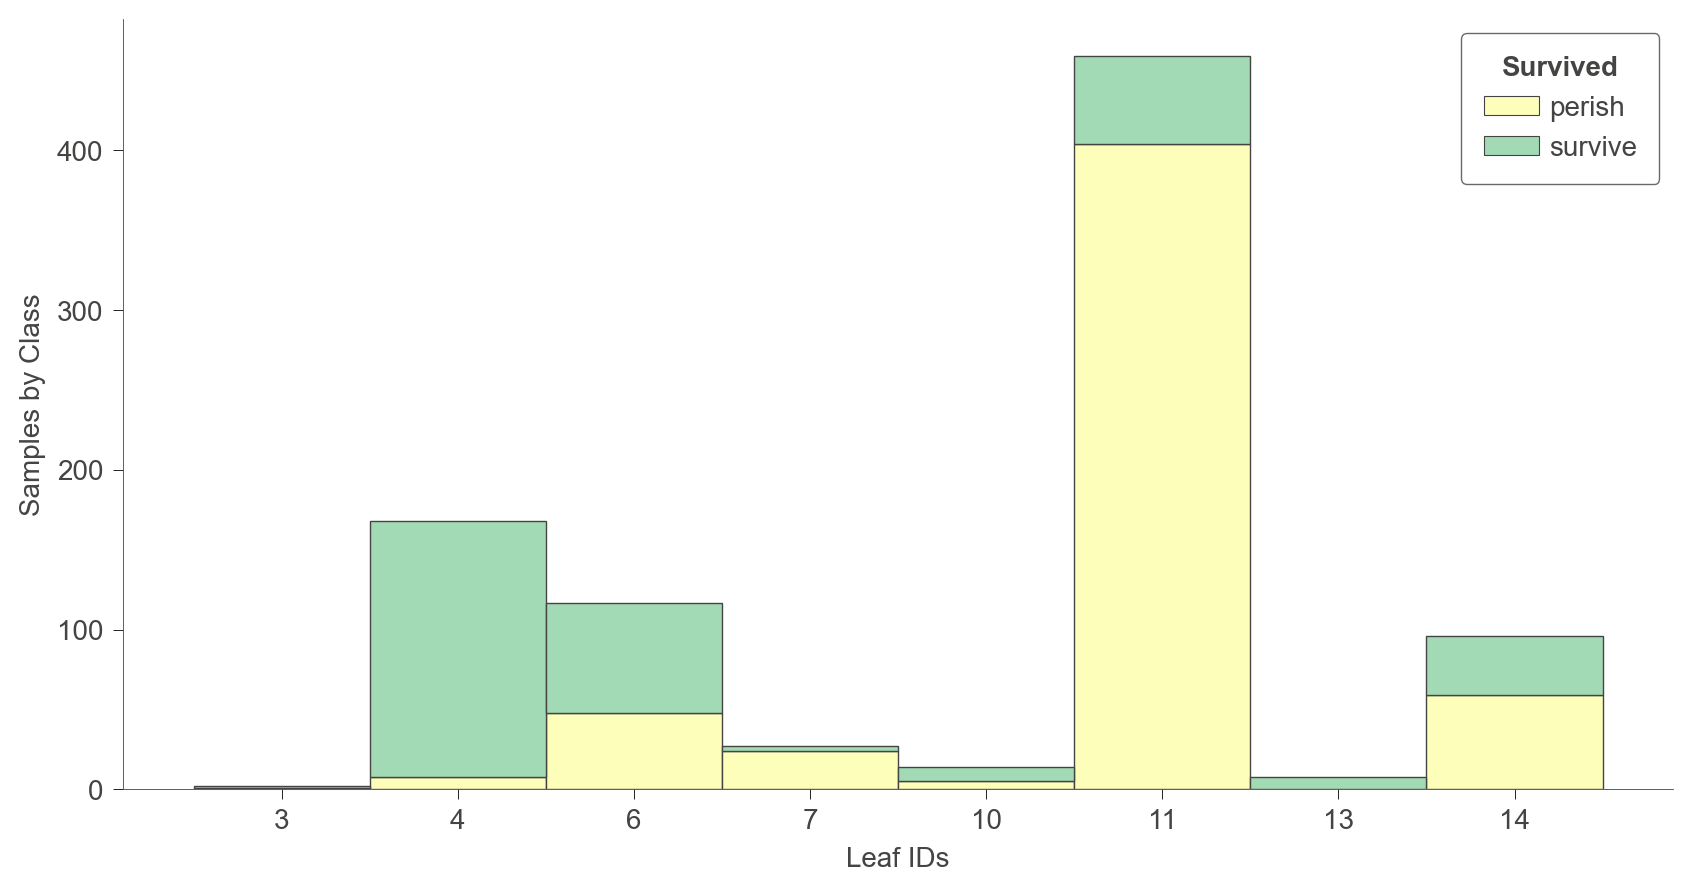

The sample distributions across the leaf nodes reveal several key characteristics about how the
decision tree partitions the data at its terminal points:
1. **Diverse Leaf Sizes:**
Leaf nodes range from very small (e.g., leaf 3 with 2 samples) to very large (e.g., leaf 11 with 459
samples). This indicates that some leaves capture very specific, narrowly defined subpopulations,
while others encompass broad, more general groups.
2. **Class Imbalance Within Leaves:**
Most leaves exhibit a strong skew toward one class, which is typical for classification trees aiming
to maximize purity. For example:
- Leaf 4 has 160 survive vs. 8 perish samples (high survival confidence).
- Leaf 11 has 404 perish vs. 55 survive samples (high perish confidence).
This skewness suggests the tree effectively isolates groups with dominant class membership.
3. **Leaves with Mixed Class Distributions:**
Some leaves have more balanced or mixed class counts, such as leaf 6 (48 perish, 69 survive) and
leaf 14 (59 pe

In [27]:
viz_model.ctree_leaf_distributions(figsize=(10,5))

In [28]:
viz_model.node_stats(node_id=11)

Pclass        Age       Fare  Sex_label  Cabin_label  Embarked_label
count     459.0      459.0      459.0      459.0        459.0           459.0
mean   2.657952  29.773855   16.04131        1.0    -0.984749        1.647059
std    0.597115  10.872936  18.720447        0.0     0.213585        0.706834
min         1.0        4.0        0.0        1.0         -1.0             0.0
25%         2.0       23.0      7.775        1.0         -1.0             2.0
50%         3.0  29.699118     8.4042        1.0         -1.0             2.0
75%         3.0      32.25       16.0        1.0         -1.0             2.0
max         3.0       74.0    227.525        1.0          3.0             2.0

The node's class label distribution is heavily skewed toward "perish" with 404 samples, compared to
55 "survive" samples, indicating a strong majority of non-survivors.
### Feature Analysis
**1. Sex_label:**
- Node mean: 1.0 (std 0.0), Training mean: 0.6476 (std 0.478)
- Interpretation: All samples in this node are labeled as 1 for Sex_label, which likely corresponds
to a single sex category (probably male or female, depending on encoding). This is a very strong
indicator since the node is pure in terms of sex, suggesting that sex is a major factor driving the
prediction toward "perish" here.
**2. Pclass:**
- Node mean: 2.66 (std 0.60), Training mean: 2.31 (std 0.84)
- Percentiles at node: 25% = 2.0, 50% = 3.0, 75% = 3.0
- Interpretation: The node's passengers tend to be in higher Pclass values (mostly 2nd and 3rd
class), with a mean higher than the overall training set. Since lower Pclass (1st class) is often
associated with better survival, this shift toward higher Pclass supports th

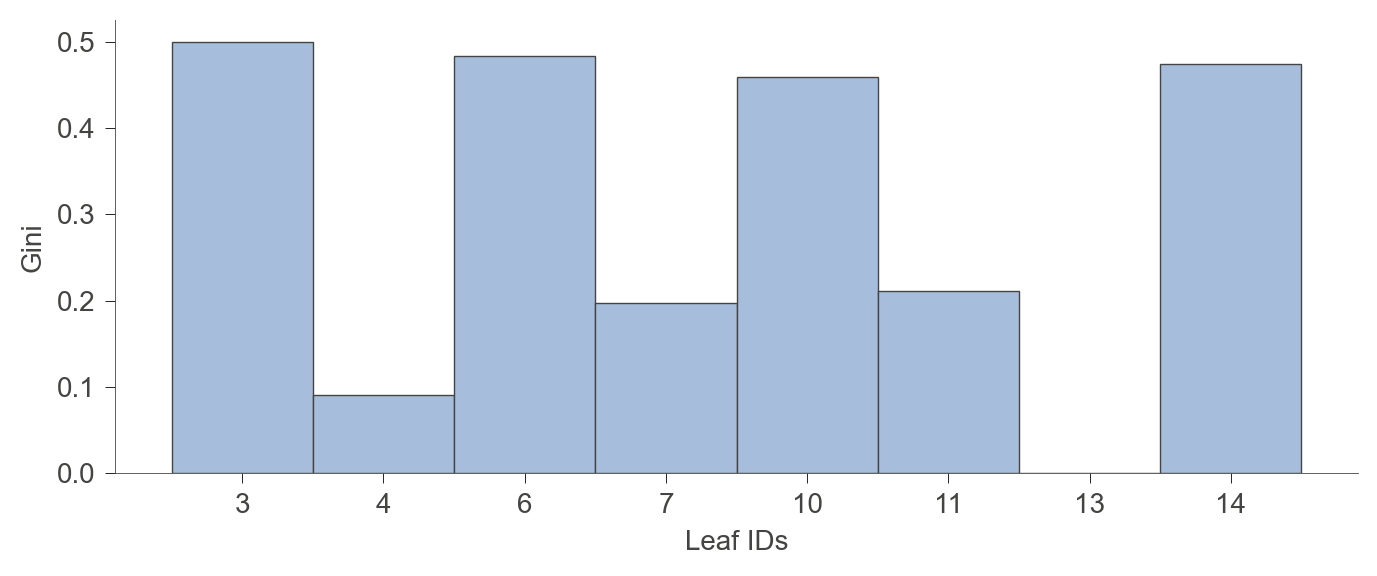

The leaf purities in this classification tree are measured using the Gini impurity criterion, which
quantifies how mixed the classes are within each leaf. A lower Gini impurity value indicates a purer
leaf, meaning the samples in that leaf predominantly belong to a single class, while a higher value
indicates more class mixing and less confidence in the prediction.
### What Leaf Purities Reveal
- **High Purity Leaves (Low Gini Impurity):**
Leaves such as node 13 (prediction confidence 1.0) and node 4 (confidence 0.95) show very high
purity. These leaves contain samples almost exclusively from one class (e.g., all survivors or all
perish). This indicates the tree has found very distinct subgroups where the classification is very
confident.
- **Moderate Purity Leaves:**
Leaves like node 6 (confidence 0.59) and node 14 (confidence 0.61) have more mixed class
distributions, reflected in higher Gini impurity values. These leaves represent regions of the
feature space where the classes overl

In [29]:
viz_model.leaf_purity(figsize=(7,3))

# Regressors

To demonstrate regressor tree visualization, we start by creating a regressors model that predicts age instead of survival:

In [30]:
features_reg = ["Pclass", "Fare", "Sex_label", "Cabin_label", "Embarked_label", "Survived"]
target_reg = "Age"

tree_regressor = DecisionTreeRegressor(max_depth=4, random_state=random_state, criterion="absolute_error")
tree_regressor.fit(dataset[features_reg].values, dataset[target_reg].values)

DecisionTreeRegressor(criterion='absolute_error', max_depth=4,
                      random_state=1234)

## Initialize dtreeviz model (adaptor)

In [ ]:
viz_rmodel = dtreeviz.model(model=tree_regressor, 
                            X_train=dataset[features_reg], 
                            y_train=dataset[target_reg], 
                            feature_names=features_reg, 
                            target_name=target_reg,
                            ai_chat=True,
                            ai_model="gpt-4.1-mini",
                            max_history_messages=10)

## Tree structure visualisations

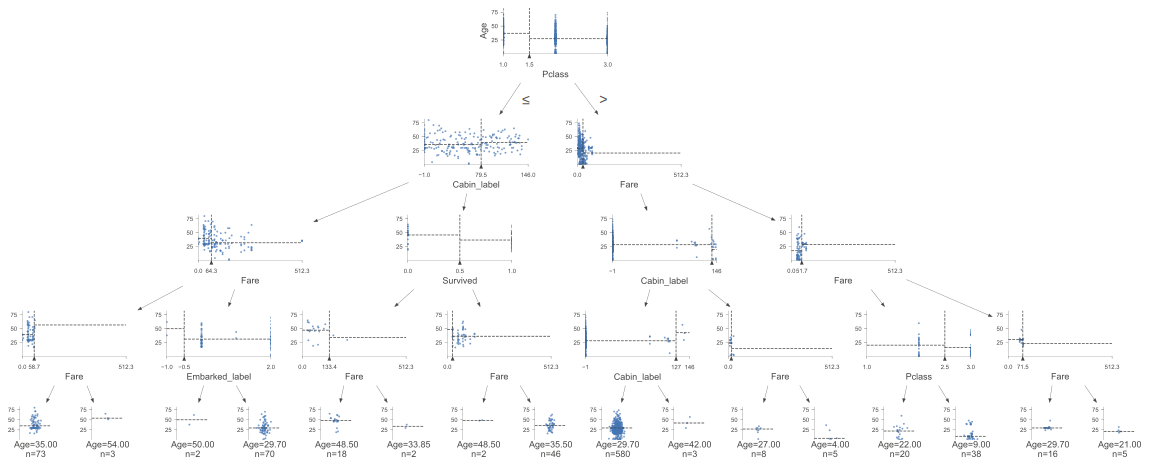

This regression decision tree is designed to predict the Age of individuals based on six features:
Pclass, Fare, Sex_label, Cabin_label, Embarked_label, and Survived. The tree uses the Absolute Error
criterion to optimize splits, which means it aims to minimize the sum of absolute deviations from
the median age in each node, making it robust to outliers.
The tree has a maximum depth of 4 and contains 31 nodes, indicating a moderately complex structure
that balances detail with generalization. The root split is on the feature Pclass with a threshold
of 1.5, which effectively separates passengers by their ticket class. This suggests that passenger
class is the most influential factor in estimating age, reflecting that different classes may have
distinct age distributions.
Subsequent splits heavily involve the Fare feature, which appears repeatedly at various levels with
different thresholds. Fare is a continuous variable representing ticket price, and its frequent use
indicates it is a s

In [32]:
viz_rmodel.view()

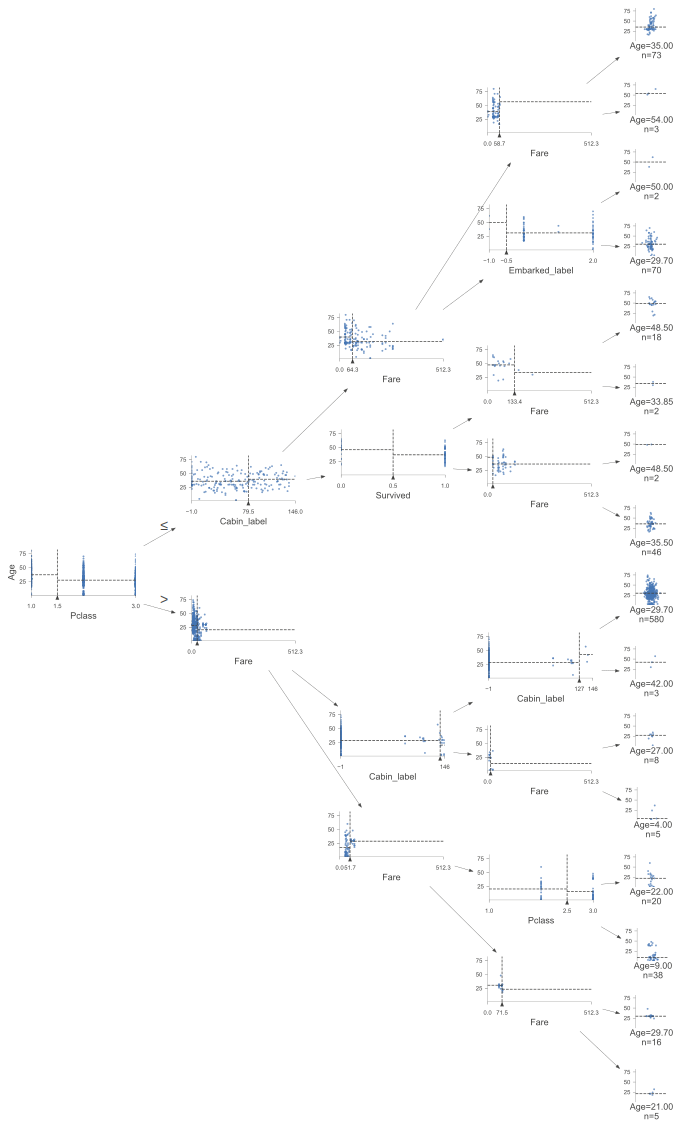

In [37]:
viz_rmodel.view(orientation="LR", ai_chat=False)

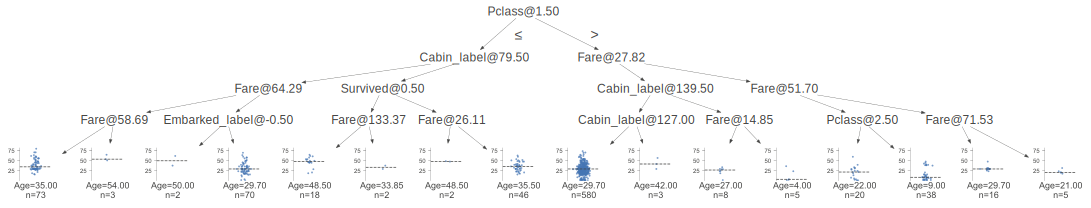

In [33]:
viz_rmodel.view(fancy=False, ai_chat=False)

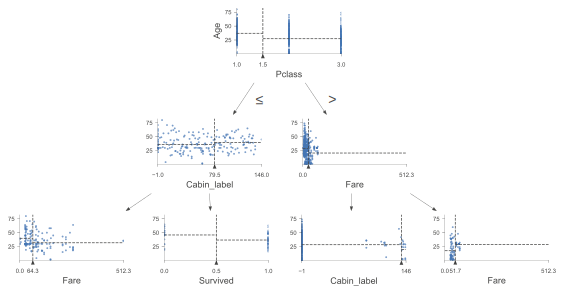

In [34]:
viz_rmodel.view(depth_range_to_display=(0, 2), ai_chat=False)

## Prediction path explanations

In [35]:
x = dataset[features_reg].iloc[10]
x

Pclass              3.0
Fare               16.7
Sex_label           0.0
Cabin_label       145.0
Embarked_label      2.0
Survived            1.0
Name: 10, dtype: float64

/Users/tudor.lapusan/Documents/workspace/personal/dtreeviz/notebooks/../dtreeviz/models/shadow_decision_tree.py:336: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
/Users/tudor.lapusan/Documents/workspace/personal/dtreeviz/notebooks/../dtreeviz/trees.py:759: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
/Users/tudor.lapusan/Documents/workspace/personal/dtreeviz/notebooks/../dtreeviz/trees.py:1788: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[po

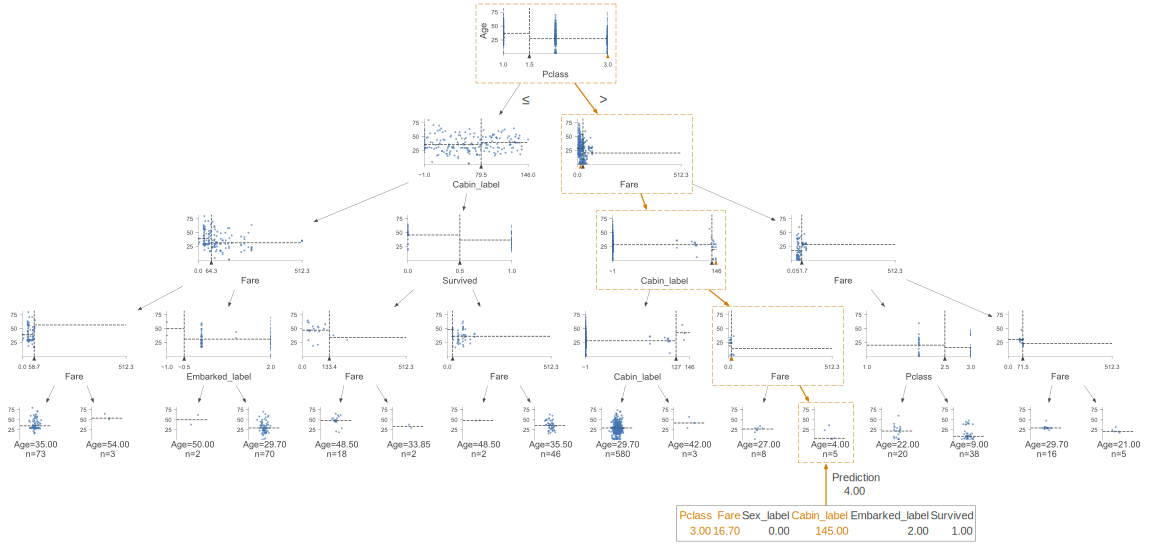

Let's walk through the decision path step-by-step to understand why the tree predicted an age of 4.0
for this instance:
1. **Pclass > 1.5 (Pclass = 3.0):**
The root split separates passengers by ticket class. Since the instance has Pclass 3 (third class),
it goes to the right subtree. This indicates the model considers third-class passengers as a
distinct group with different age characteristics compared to first and second class.
2. **Fare <= 27.82 (Fare = 16.70):**
Within the third-class group, the next split is on Fare. The instance's fare of 16.70 is less than
or equal to 27.82, so it moves to the left child node. This split further segments passengers by
ticket price, reflecting that lower fare within third class correlates with certain age patterns.
3. **Cabin_label > 139.5 (Cabin_label = 145.0):**
Next, the tree splits on Cabin_label, which is a numeric encoding of cabin information. The
instance's cabin label of 145 is greater than 139.5, so it goes to the right child node. Thi

In [36]:
viz_rmodel.view(x = x)

/Users/tudor.lapusan/Documents/workspace/personal/dtreeviz/notebooks/../dtreeviz/models/shadow_decision_tree.py:336: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
/Users/tudor.lapusan/Documents/workspace/personal/dtreeviz/notebooks/../dtreeviz/trees.py:759: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
/Users/tudor.lapusan/Documents/workspace/personal/dtreeviz/notebooks/../dtreeviz/trees.py:1788: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[po

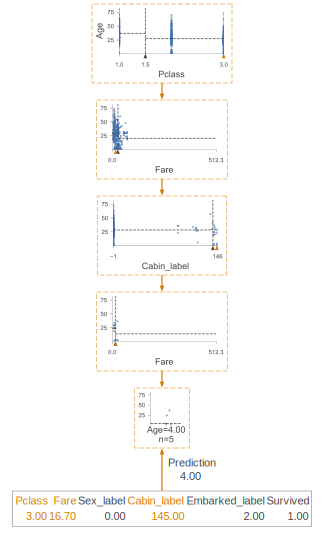

The prediction of age 4.0 for this instance results from a sequence of splits that progressively
narrow down the group of passengers to a very specific subset with similar characteristics and young
ages:
1. **Pclass > 1.5 (Pclass = 3.0):**
The first split separates passengers by ticket class. Since this passenger is in third class (Pclass
= 3), they move to the right subtree. This indicates the model recognizes that third-class
passengers tend to have different age distributions compared to first and second class.
2. **Fare <= 27.82 (Fare = 16.70):**
Within the third-class group, the next split is on Fare. The passenger’s fare of 16.70 is less than
or equal to 27.82, so they move to the left child node. This split further segments passengers by
ticket price, capturing finer distinctions in age related to fare within the third class.
3. **Cabin_label > 139.5 (Cabin_label = 145.0):**
The next split is on Cabin_label, a numeric encoding of cabin information. The passenger’s cabin
label of

In [37]:
viz_rmodel.view(show_just_path=True, x = x)

In [38]:
print(viz_rmodel.explain_prediction_path(x))

1.5 <= Pclass 
14.85 <= Fare  < 27.82
139.5 <= Cabin_label 



/Users/tudor.lapusan/Documents/workspace/personal/dtreeviz/notebooks/../dtreeviz/models/shadow_decision_tree.py:336: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
/Users/tudor.lapusan/Documents/workspace/personal/dtreeviz/notebooks/../dtreeviz/interpretation.py:54: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`


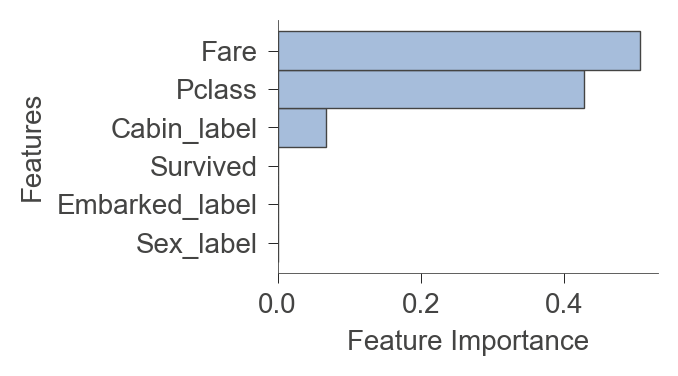

The prediction for this instance is shaped primarily by the three features that the tree found most
informative, as reflected in the feature importance ranking:
1. **Fare (importance 0.5055):**
Fare is the most influential feature in the model, contributing over 50% of the decision power. In
the decision path, Fare is used twice: first to split passengers paying less than or equal to 27.82
from those paying more, and then again at a finer threshold of 14.85. These splits segment the data
into groups with distinct age distributions based on ticket price, which strongly correlates with
socioeconomic status and thus age. The instance’s Fare of 16.70 places it in a subgroup with
relatively low to moderate fares, which the tree associates with younger ages in this context.
2. **Pclass (importance 0.4273):**
Pclass is the second most important feature, accounting for about 43% of the model’s
decision-making. The root split on Pclass > 1.5 separates first and second class from third class
pas

In [39]:
viz_rmodel.instance_feature_importance(x, figsize=(3.5,2))

## Leaf info

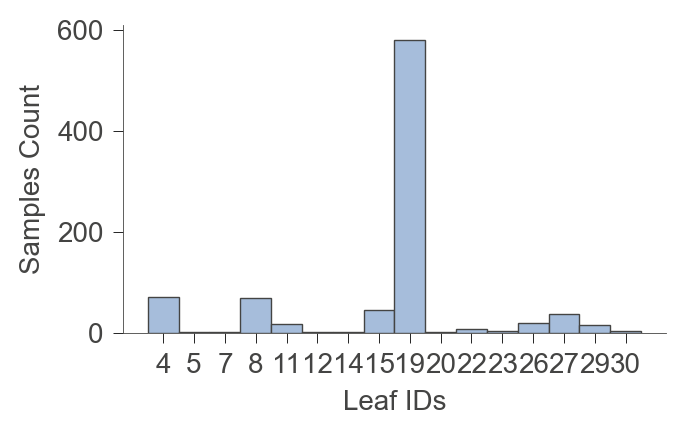

Examining the leaf nodes reveals a wide variation in sample counts and prediction distributions,
which has important implications for the model’s reliability and generalization:
1. **Sample Counts in Leaves:**
- The number of samples per leaf ranges from very small (as few as 2 or 3 samples) to quite large
(up to 580 samples). For example, leaf node 19 contains 580 samples, while leaf nodes like 5, 7, 12,
and 14 have only 2 or 3 samples each.
- This imbalance indicates that some leaves represent broad, general groups (large sample leaves),
while others capture very specific, narrow subpopulations (small sample leaves).
2. **Implications of Small Sample Leaves:**
- Leaves with very few samples (2-5) can lead to overfitting and less stable predictions because the
model’s prediction is based on a tiny subset of data. For instance, the leaf predicting age 4.0 has
only 5 samples, which may not be representative of a broader population.
- Small leaves often have lower prediction standard dev

In [40]:
viz_rmodel.leaf_sizes(figsize=(3.5,2))

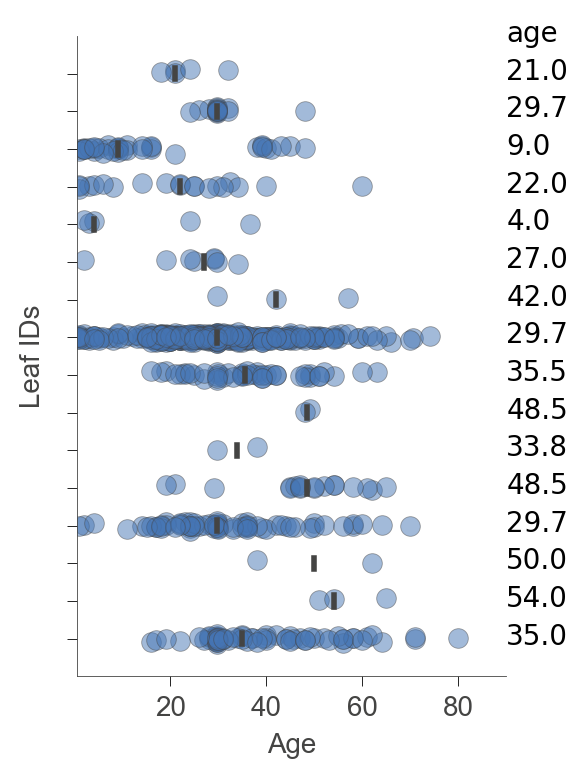

In [41]:
viz_rmodel.rtree_leaf_distributions()

In [42]:
viz_rmodel.node_stats(node_id=4)

Pclass       Fare  Sex_label  Cabin_label  Embarked_label  Survived
count    73.0       73.0       73.0         73.0            73.0      73.0
mean      1.0  34.018607   0.808219    22.205479        1.287671  0.438356
std       0.0   14.57248   0.396426     24.79693        0.964357  0.499619
min       1.0        0.0        0.0         -1.0             0.0       0.0
25%       1.0      26.55        1.0         -1.0             0.0       0.0
50%       1.0       30.5        1.0         13.0             2.0       0.0
75%       1.0       49.5        1.0         49.0             2.0       1.0
max       1.0    57.9792        1.0         71.0             2.0       1.0

The node’s target age distribution has a mean of 39.1751 years, with a standard deviation of
13.4422, and ages ranging from 16 to 80. This indicates the node represents a relatively older
subset of passengers with moderate variability in age.
### Feature Analysis (Focusing on top contributors: Pclass, Fare, Cabin_label)
**1. Pclass:**
- Node mean: 1.0 (all samples are first class)
- Training mean: 2.31 (overall dataset skewed towards 3rd class)
- Node std: 0.0 (no variation, all first class)
- Training std: 0.836 (variation across classes)
- Node min/max/percentiles: all 1.0
**Implication:**
This node exclusively contains first-class passengers, a stark contrast to the overall dataset where
most passengers are in 2nd or 3rd class. This strong concentration on first class likely contributes
to the higher mean age, as first-class passengers tend to be older.
**2. Fare:**
- Node mean: 34.02, higher than training mean of 32.20
- Node std: 14.57, much lower than training std of 49.69 (less 

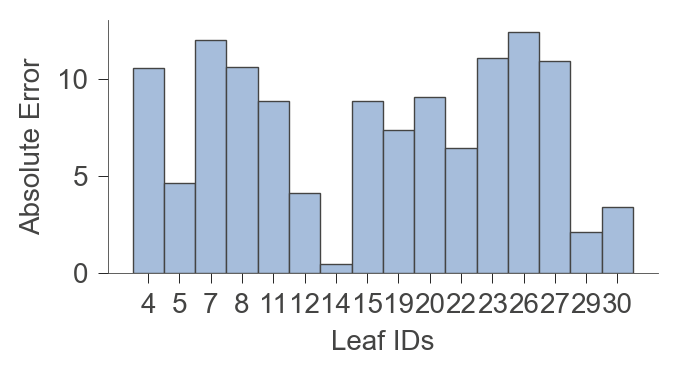

The leaf criterion in this regression tree is based on the **Absolute Error** (also known as mean
absolute deviation from the median prediction in the leaf). This criterion measures the average
absolute difference between the actual target values (ages) of the samples in the leaf and the
leaf’s predicted value. Lower criterion values indicate that the leaf’s prediction closely fits the
samples it contains, implying higher prediction accuracy and reliability for that leaf.
### What the leaf criterion values reveal:
- **Lower criterion values** in a leaf mean the samples in that leaf have ages tightly clustered
around the predicted value, resulting in smaller absolute errors. This suggests the leaf’s
prediction is stable and reliable for samples falling into that leaf.
- **Higher criterion values** indicate more spread or variability in the target ages within the
leaf, meaning the prediction is less precise and the leaf is less reliable for accurate age
estimation.
### Relation to leaf s

In [43]:
viz_rmodel.leaf_purity(figsize=(3.5,2))

# Feature Space Partitioning

Decision trees partition feature space in such a way as to maximize target value purity for the instances associated with a node. It's often useful to visualize the feature space partitioning, although it's not feasible to visualize more than a couple of dimensions.

## Classification

To visualize how it decision tree partitions a single feature, let's train a shallow decision tree classifier using the toy Iris data.

In [44]:
from sklearn.datasets import load_iris
iris = load_iris()
features = list(iris.feature_names)
class_names = iris.target_names
X = iris.data
y = iris.target

In [45]:
dtc_iris = DecisionTreeClassifier(max_depth=2, min_samples_leaf=1, random_state=666)
dtc_iris.fit(X, y)

DecisionTreeClassifier(max_depth=2, random_state=666)

In [46]:
viz_model = dtreeviz.model(dtc_iris,
                           X_train=X, y_train=y,
                           feature_names=features,
                           target_name='iris',
                           class_names=class_names)

The following diagram indicates that the decision tree splits the petal width feature into three mostly-pure regions (using `random_state` above to get the same tree each time):

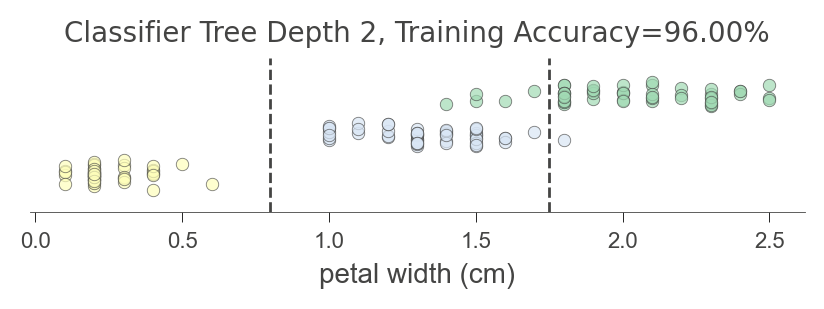

In [47]:
viz_model.ctree_feature_space(show={'splits','title'}, features=['petal width (cm)'],
                             figsize=(5,1))

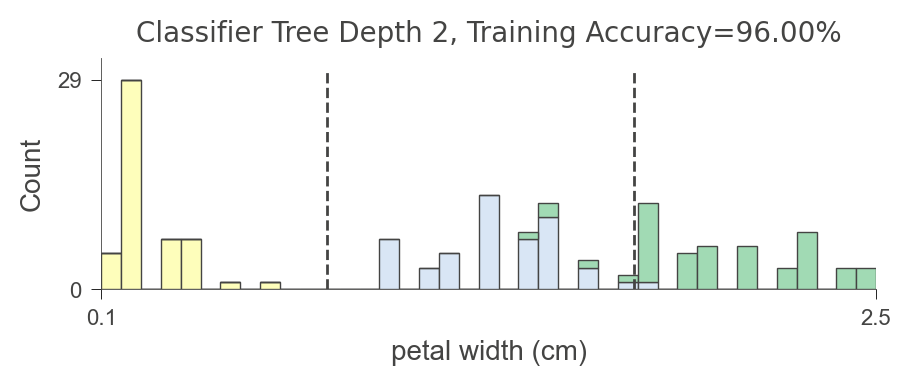

In [48]:
viz_model.ctree_feature_space(nbins=40, gtype='barstacked', show={'splits','title'}, features=['petal width (cm)'],
                             figsize=(5,1.5))

A deeper tree gives this finer grand partitioning of the single feature space:

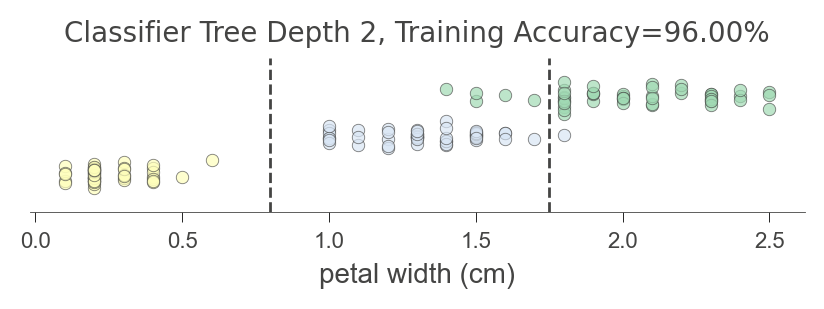

In [49]:
viz_model.ctree_feature_space(show={'splits','title'}, features=['petal width (cm)'],
                              figsize=(5,1))

Let's look at how a decision tree partitions two-dimensional feature space.

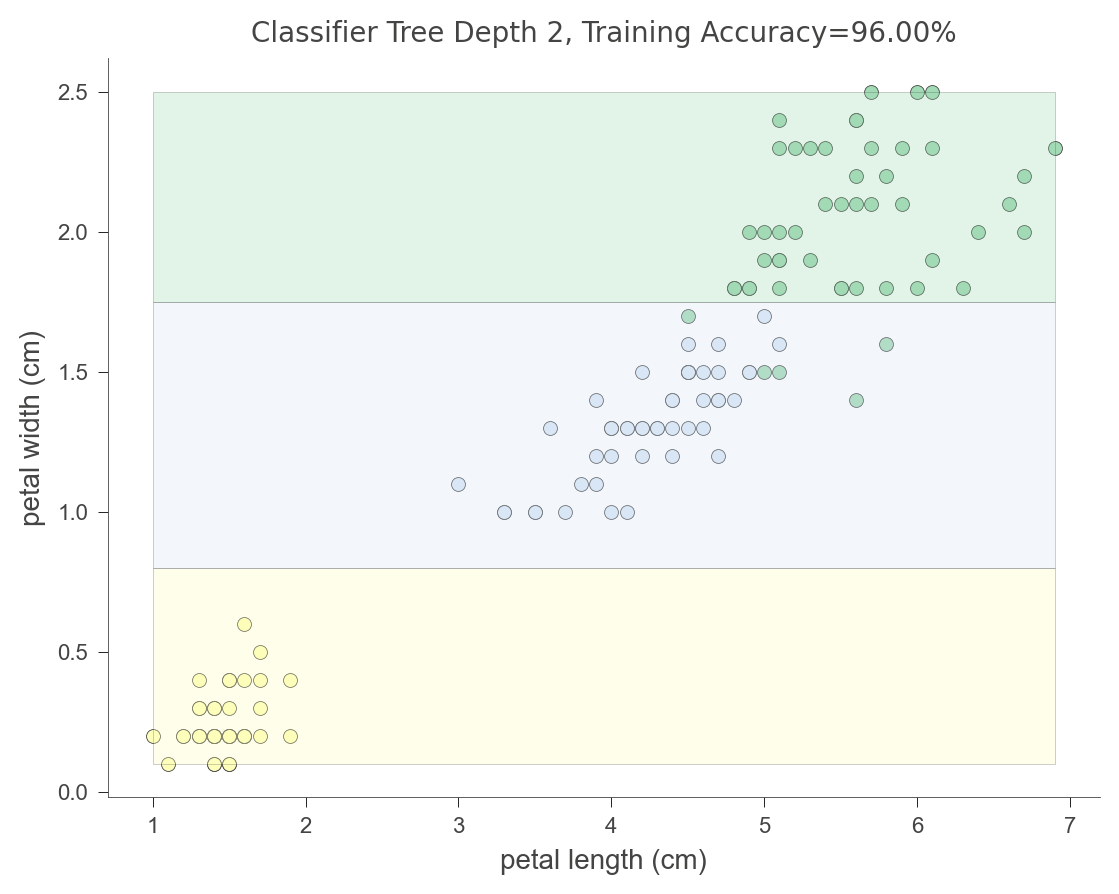

In [50]:
viz_model.ctree_feature_space(show={'splits','title'}, features=['petal length (cm)', 'petal width (cm)'])

## Regression

To demonstrate regression, let's load a toy Cars data set and visualize the partitioning of univariate and bivariate feature spaces.

In [51]:
dataset_url = "https://raw.githubusercontent.com/parrt/dtreeviz/master/data/cars.csv"
df_cars = pd.read_csv(dataset_url)
X = df_cars.drop('MPG', axis=1)
y = df_cars['MPG']
features = list(X.columns)

In [52]:
dtr_cars = DecisionTreeRegressor(max_depth=3, criterion="absolute_error")
dtr_cars.fit(X.values, y.values)

DecisionTreeRegressor(criterion='absolute_error', max_depth=3)

In [53]:
viz_rmodel = dtreeviz.model(dtr_cars, X, y,
                            feature_names=features,
                            target_name='MPG')

The following visualization illustrates how the decision tree breaks up the `WGT` (car weight) in order to get relatively pure `MPG` (miles per gallon) target values.

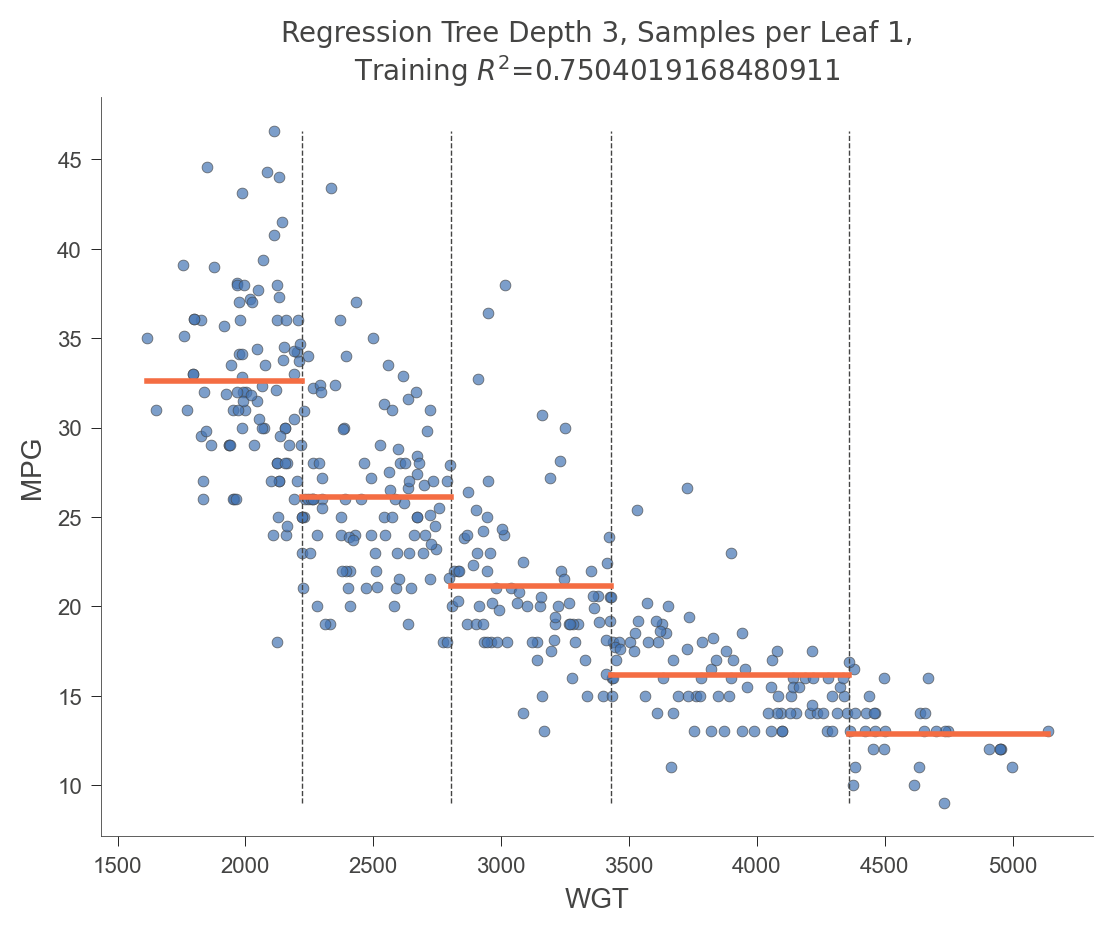

In [54]:
viz_rmodel.rtree_feature_space(features=['WGT'])

In order to visualize two-dimensional feature space, we can draw in three dimensions:

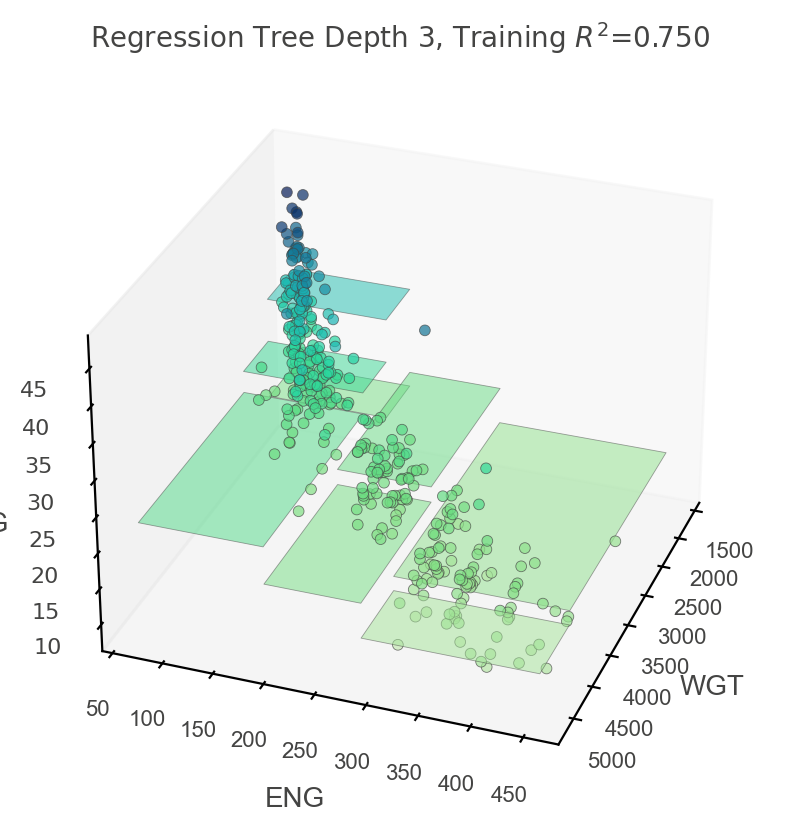

In [55]:
viz_rmodel.rtree_feature_space3D(features=['WGT','ENG'],
                                 fontsize=10,
                                 elev=30, azim=20,
                                 show={'splits', 'title'},
                                 colors={'tessellation_alpha': .5})

Equivalently, we can show a heat map as if we were looking at the three-dimensional plot from the top down:

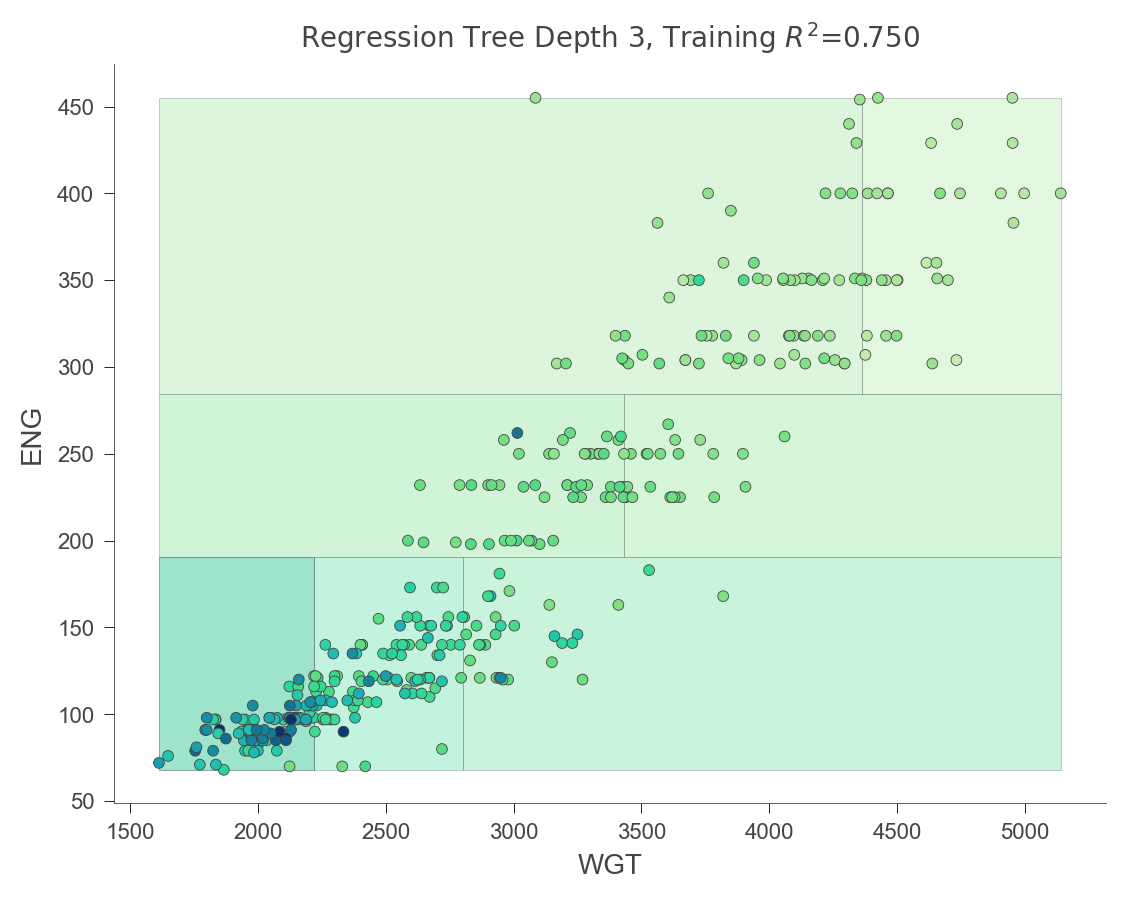

In [56]:
viz_rmodel.rtree_feature_space(features=['WGT','ENG'])